# EXPLORATORY DATA ANALYSIS (ANALISIS EXPLORATORIO DE DATOS)

This document has a simple exploratory analysis, it is about visualizing what type of information the dataset has, how some variables behave, what magnitudes and units are handled and very superficial things.

## Data Weather

## Importing Libraries and Loading Data

In [117]:
# Data processing
import pandas as pd
import numpy as np

# Graph
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing and analysis
import statsmodels.api as sm
from scipy import stats

# Configuration matplotlib
plt.style.use('ggplot')

## Data

Import data from the downloaded CSV file. There is also the option to import it from a direct link, depending on the source.

In [118]:
## Dowload DataSet:
# https://www.kaggle.com/datasets/heidarmirhajisadati/germany-city-rainfall-data

data = pd.read_csv("data/Rainfall_Data_Germany_Complete.csv")
print(data.head(5))

     City  Latitude  Longitude  Month  Year  Rainfall (mm)  Elevation (m)  \
0  Berlin     52.52     13.405      1  2015          71.56             34   
1  Berlin     52.52     13.405      2  2015         129.56             34   
2  Berlin     52.52     13.405      3  2015          24.58             34   
3  Berlin     52.52     13.405      4  2015         177.73             34   
4  Berlin     52.52     13.405      5  2015         100.62             34   

  Climate_Type  Temperature (°C)  Humidity (%)  
0      Oceanic              19.6            72  
1      Oceanic              31.4            88  
2      Oceanic              15.4            61  
3      Oceanic              15.1            62  
4      Oceanic              -3.0            57  


### Data Overview

Functions like .info() allow you to view the amount of data, the data type of columns, whether or not there is null data, and other information.

In [119]:
print(data.info())
print()

# Check for duplicate data
print(f"Duplicate records found: {data.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              1080 non-null   object 
 1   Latitude          1080 non-null   float64
 2   Longitude         1080 non-null   float64
 3   Month             1080 non-null   int64  
 4   Year              1080 non-null   int64  
 5   Rainfall (mm)     1080 non-null   float64
 6   Elevation (m)     1080 non-null   int64  
 7   Climate_Type      1080 non-null   object 
 8   Temperature (°C)  1080 non-null   float64
 9   Humidity (%)      1080 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 84.5+ KB
None

Duplicate records found: 0


## Columns of DataFrame

In [120]:
data.columns

Index(['City', 'Latitude', 'Longitude', 'Month', 'Year', 'Rainfall (mm)',
       'Elevation (m)', 'Climate_Type', 'Temperature (°C)', 'Humidity (%)'],
      dtype='object')

## Non-Numeric Data Description

In [121]:
print("Number of Unique Values ​​of Type",
      f"de Clima: {data['Climate_Type'].nunique()}")
print(data['Climate_Type'].value_counts())
print()

print(f"Number of Unique City Values: {data['City'].nunique()}")
print(data['City'].value_counts())
print()

Number of Unique Values ​​of Type de Clima: 2
Climate_Type
Oceanic        648
Continental    432
Name: count, dtype: int64

Number of Unique City Values: 10
City
Berlin        108
Munich        108
Hamburg       108
Cologne       108
Frankfurt     108
Stuttgart     108
Dusseldorf    108
Dresden       108
Leipzig       108
Hanover       108
Name: count, dtype: int64



## Numeric Data Description

In [122]:
print(data.describe())

          Latitude    Longitude        Month         Year  Rainfall (mm)  \
count  1080.000000  1080.000000  1080.000000  1080.000000    1080.000000   
mean     51.002410    10.242190     6.500000  2019.000000      99.211787   
std       1.576498     2.351316     3.453652     2.583185      57.560449   
min      48.135100     6.773500     1.000000  2015.000000       0.000000   
25%      50.110900     8.682100     3.750000  2017.000000      49.500000   
50%      51.139050     9.862850     6.500000  2019.000000      99.425000   
75%      52.375900    12.373100     9.250000  2021.000000     149.527500   
max      53.551100    13.737300    12.000000  2023.000000     199.910000   

       Elevation (m)  Temperature (°C)  Humidity (%)  
count     1080.00000       1080.000000   1080.000000  
mean       127.20000         14.724259     65.153704  
std        145.90981         11.433380     20.303775  
min          6.00000         -5.000000     30.000000  
25%         37.00000          4.975000  

### Data grouping

In [123]:
newdf = data.groupby("City")["Rainfall (mm)"].describe()
print(newdf)

            count        mean        std   min      25%      50%       75%  \
City                                                                         
Berlin      108.0   93.916204  56.299867  0.03  52.4800   90.705  141.7025   
Cologne     108.0  107.924722  58.387136  0.00  60.2700  115.550  157.7650   
Dresden     108.0  105.138519  57.727262  2.88  52.9000  115.975  152.5625   
Dusseldorf  108.0   95.028056  54.275231  1.06  44.3575   96.910  139.5750   
Frankfurt   108.0   94.446574  57.030150  1.66  51.4600   86.635  137.8750   
Hamburg     108.0  101.365463  59.186303  1.81  49.1225  100.485  153.3875   
Hanover     108.0   96.799815  54.305076  0.13  47.2150   95.125  148.7600   
Leipzig     108.0  100.441111  60.542682  3.83  42.3100   98.885  156.7800   
Munich      108.0   99.247685  61.244167  0.27  48.3950   95.790  155.1200   
Stuttgart   108.0   97.809722  56.903129  0.40  49.6375  100.580  146.8075   

               max  
City                
Berlin      193.21  


### Crosstabs of Data

Creating crosstabs allows you to summarize information based on columns from the same dataset.

In [124]:
pd.crosstab(data["City"],data["Climate_Type"])

Climate_Type,Continental,Oceanic
City,,
Berlin,0,108
Cologne,0,108
Dresden,108,0
Dusseldorf,0,108
Frankfurt,0,108
Hamburg,0,108
Hanover,0,108
Leipzig,108,0
Munich,108,0


## Graphical Analysis of Variables

### Histogram of Variables

The histogram will show if the data somehow shows a tendency toward a specific value, and the normal function is the theoretical function that a distribution showing that pattern should follow.

In [125]:
#  We create a new DF with the necessary columns for the histogram
df_var = data[['Rainfall (mm)','Temperature (°C)', 'Humidity (%)']]

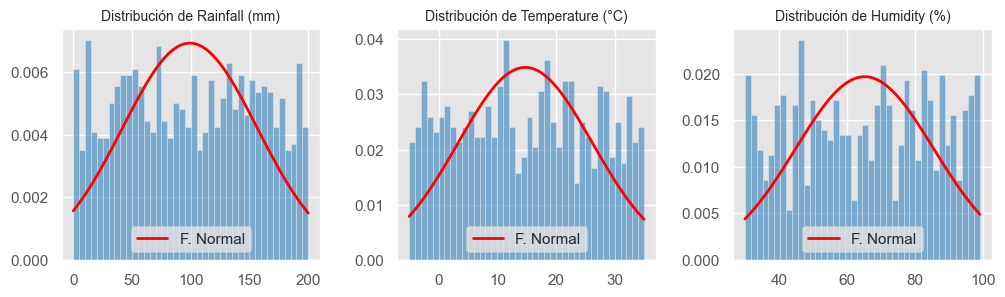

In [126]:
num_columns = len(df_var.columns)

fig, ax = plt.subplots(1, 3,figsize=(12,3))
ax = ax.flatten()

for idx, column in enumerate(df_var):
    df_temp = df_var[column]
    mu, sigma = stats.norm.fit(df_temp)
    x_hat = np.linspace(min(df_temp), max(df_temp), num = 100)
    y_hat = stats.norm.pdf(x_hat,mu,sigma)

    #  -----------  Linear normal distribution graphs
    ax[idx].plot(x_hat, y_hat, 
                 linewidth = 2, label = "F. Normal", color = "red")
    
    #  -----------  Histogram graphs
    ax[idx].hist(x=df_temp, 
                 density=True, bins=40, color="#3182bd", alpha=0.6) 
    
    ax[idx].set_title(f'Distribución de {column}',fontsize = 10)
    ax[idx].set_ylabel('Densidad de probabilidad')
    ax[idx].legend(loc='lower center', bbox_to_anchor=(0.5, 0), ncol=1)
    
#  ---------------  Remove titles from the Y axes
for ax in ax:
    ax.set_ylabel("")

#  ---------------  Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

### Q-Q Plots
Another frequently used representation is theoretical quantile plots (Q-Q plots).

These plots compare the quantiles of the observed distribution with the theoretical quantiles of a normal distribution with the same mean and standard deviation as the data. The closer the data are to a normal distribution, the more closely the points are aligned with the line.

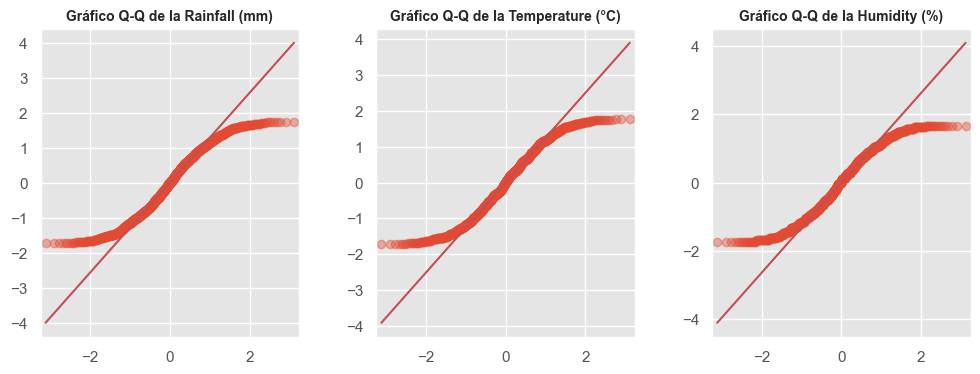

In [127]:
num_columns = len(df_var.columns)

fig, ax = plt.subplots(1, num_columns,figsize=(12,4))
ax = ax.flatten()

for idx, column in enumerate(df_var):
    sm.qqplot(data=df_var[column], fit = True, line  = 'q', 
              alpha = 0.4, lw = 2, ax = ax[idx])
    
    ax[idx].set_title(f'Gráfico Q-Q de la {column}', 
                      fontsize = 10, fontweight = "bold")

for ax in ax:
    ax.set_ylabel("")  # Remove title del eje Y
    ax.set_xlabel("")  # Remove title del eje x
    
plt.subplots_adjust(hspace=0.9,wspace=0.3)
plt.show()

### Box Plot

This type of plot helps visualize the distribution of data in a simple way. Depending on the values ​​on the Y axis, it may be convenient to graph them separately to clearly see the limits of the graph in each case.

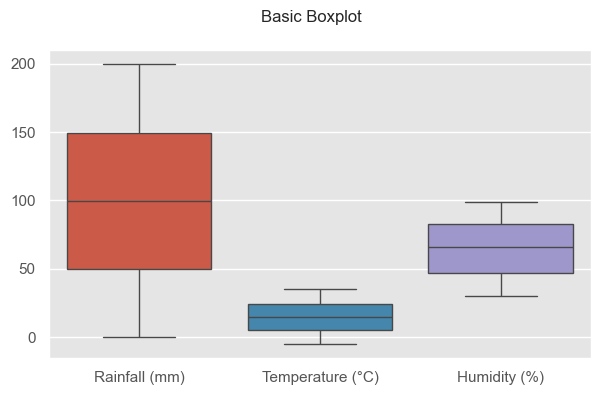

In [128]:
plt.figure(figsize=(7, 4))

sns.boxplot(data=df_var)

plt.suptitle('Basic Boxplot') 
plt.show()

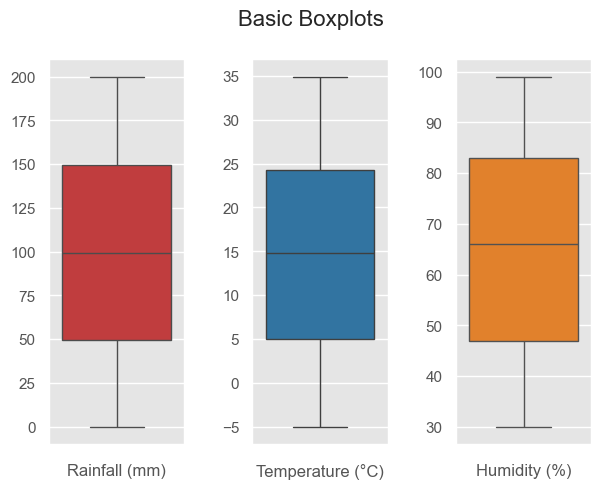

In [129]:
varb = ['Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)'].copy()

fig,ax = plt.subplots(1,3,figsize = (7,5))

plt.suptitle("Basic Boxplots", fontsize=16)

colors = ["#d62728","#1f77b4","#ff7f0e"]

for i, var in enumerate(varb):
    sns.boxplot(y = df_var[var], ax = ax[i], color = colors[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(varb[i])

plt.subplots_adjust(wspace=0.5)

plt.show()

### Pair Plot

A type of graph or graphic matrix that takes numerical columns and plots them: variable vs. variable. This way, you can see the influence of one variable on another, if it exists.

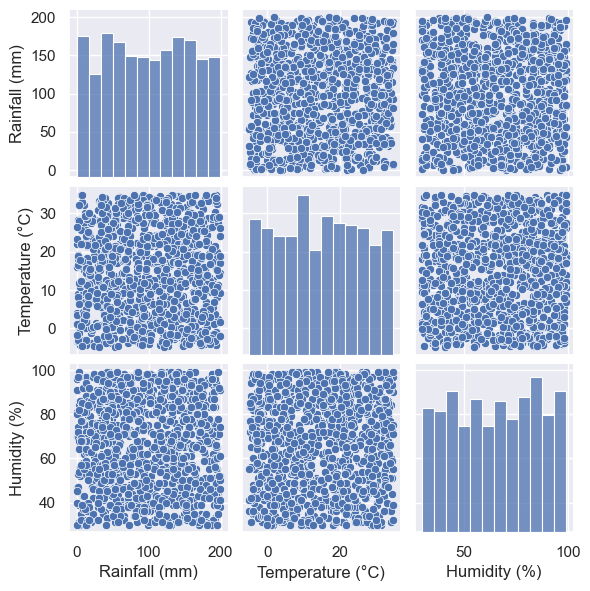

In [130]:
sns.set()
sns.pairplot(df_var,height=2)
plt.show()

## Creating Grouped Tables for Temporal Analysis of Variables

Sometimes, depending on the type of analysis and other factors, it is necessary to group data to continue with the analysis. This happens a lot with the analysis of time series or locations such as cities or points of sale.

In this case, to see the behavior of the variables over the months and years, we make the following grouped tables.

In [131]:
# Agrupar por año-mes
datapmonthyear = data.groupby(["Month", "Year"]).agg({
    "Rainfall (mm)": "mean",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

# Agrupar por año
datapyear = datapmonthyear.groupby(["Year"]).agg({
    "Rainfall (mm)": "sum",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

# Agrupar por mes
datapmont = data.groupby(["Month"]).agg({
    "Rainfall (mm)": "mean",
    "Temperature (°C)": "mean",
    "Humidity (%)": "mean"
}).reset_index()

print(datapmonthyear.head(5))
print()
print(datapyear)
print()
print(datapmont)

   Month  Year  Rainfall (mm)  Temperature (°C)  Humidity (%)
0      1  2015         77.276             13.21          62.3
1      1  2016        119.093             15.05          61.3
2      1  2017        117.977             15.22          66.2
3      1  2018         99.510             12.91          51.1
4      1  2019        102.092             19.32          54.6

   Year  Rainfall (mm)  Temperature (°C)  Humidity (%)
0  2015       1184.969         14.402500     63.750000
1  2016       1212.427         14.345000     66.241667
2  2017       1205.000         15.623333     65.991667
3  2018       1113.007         16.520833     62.850000
4  2019       1255.997         15.535833     66.933333
5  2020       1282.551         13.565000     67.500000
6  2021       1156.941         14.841667     68.108333
7  2022       1130.576         13.775833     63.191667
8  2023       1173.405         13.908333     61.816667

    Month  Rainfall (mm)  Temperature (°C)  Humidity (%)
0       1     102.3

## Temporal Analysis

### Precipitation Variable Behavior

Focusing on the precipitation variable, we will continue observing its behavior in different temporalities.

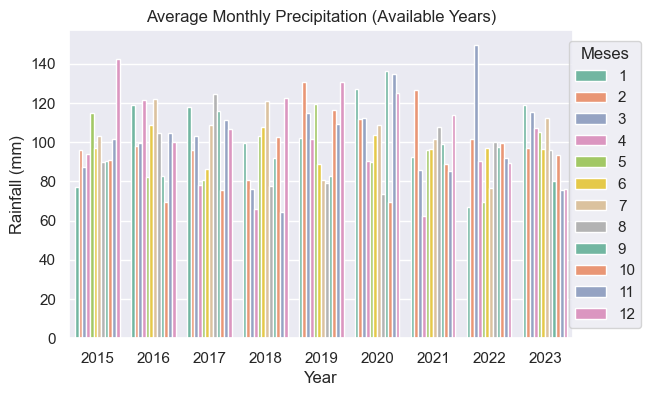

In [132]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmonthyear, x = "Year", y = "Rainfall (mm)", 
            hue ="Month", palette="Set2")

ax.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1,title="Meses")
ax.set_title("Average Monthly Precipitation (Available Years)")
plt.show()

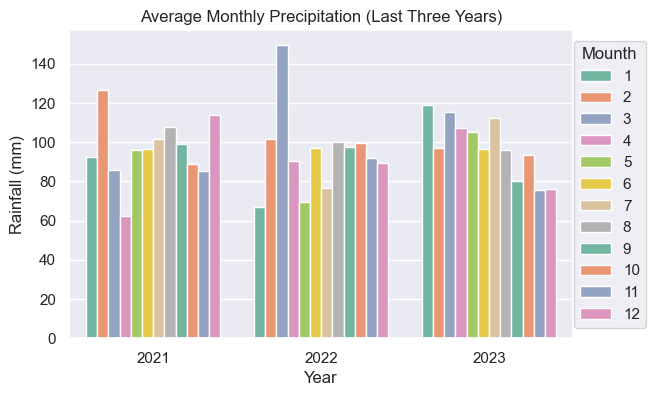

In [133]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmonthyear[datapmonthyear["Year"] >= 2021], 
            x = "Year", y = "Rainfall (mm)", hue ="Month", palette="Set2")

ax.legend(loc='right', bbox_to_anchor=(1.16, 0.5), ncol=1,title="Mounth")
ax.set_title("Average Monthly Precipitation (Last Three Years)")
plt.show()

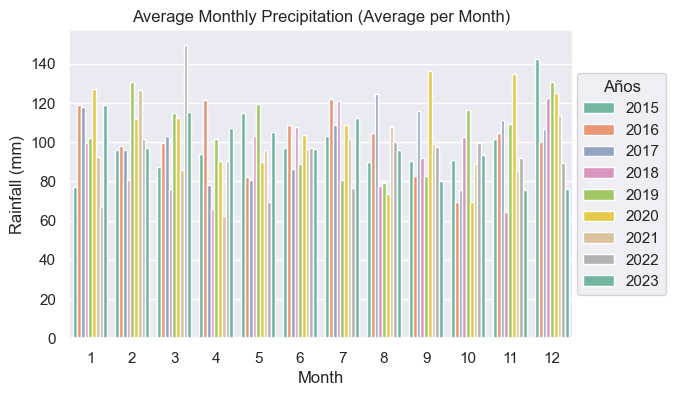

In [134]:
ig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmonthyear, x = "Month", 
            y = "Rainfall (mm)", hue ="Year", palette="Set2")
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1,title="Años")
ax.set_title("Average Monthly Precipitation (Average per Month)")
plt.show()

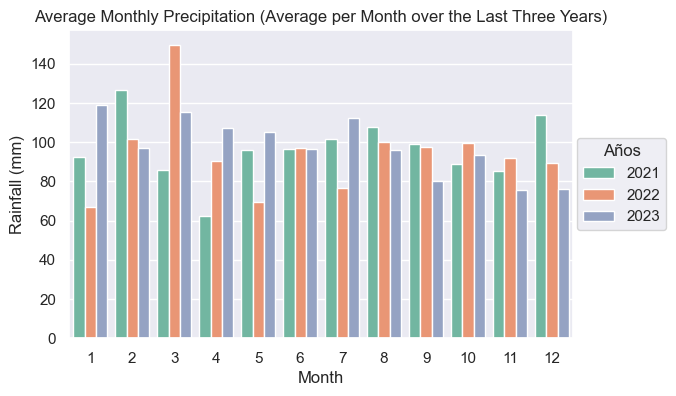

In [135]:
fig, ax = plt.subplots(figsize = (6.5,4))
sns.barplot(data = datapmonthyear[datapmonthyear["Year"]>=2021], 
            x = "Month", y = "Rainfall (mm)", hue ="Year", palette="Set2")
ax.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1,title="Años")
ax.set_title("Average Monthly Precipitation (Average per Month over the Last Three Years)")
plt.show()

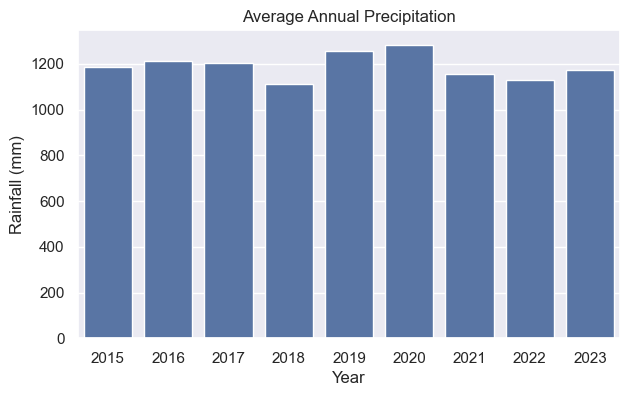

In [136]:
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = datapyear, x = "Year", 
            y = "Rainfall (mm)")
ax.set_title("Average Annual Precipitation")
plt.show()

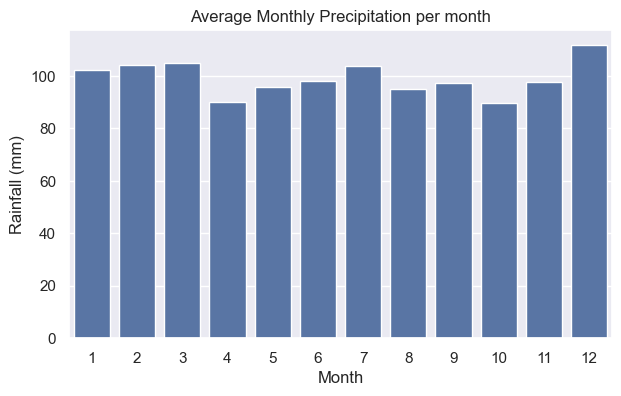

In [137]:
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = datapmont, x = "Month", 
            y = "Rainfall (mm)")
ax.set_title("Average Monthly Precipitation per month")
plt.show()

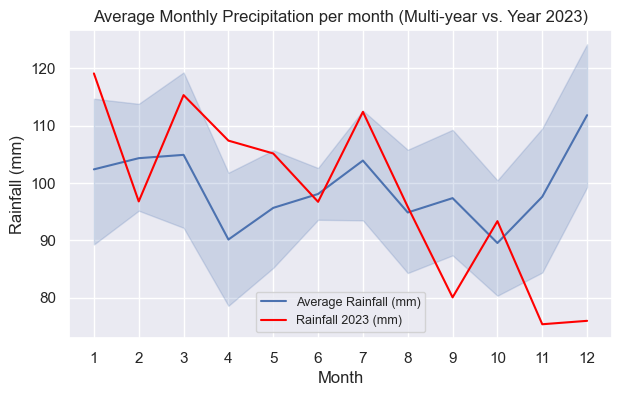

In [138]:
fig, ax = plt.subplots(figsize = (7,4))

sns.lineplot(data = datapmonthyear, x = "Month", 
             y = "Rainfall (mm)", ax = ax, label = "Average Rainfall (mm)")

dfr = datapmonthyear[datapmonthyear["Year"] == 2023]

sns.lineplot(data = datapmonthyear[datapmonthyear["Year"] == 2023], 
             x = "Month", y = "Rainfall (mm)",color="red", ax = ax, label = "Rainfall 2023 (mm)")

ax.set_xticks(range(1, 13))
ax.set_title("Average Monthly Precipitation per month (Multi-year vs. Year 2023)")
ax.legend(loc="lower center",fontsize=9, ncol=1)
plt.show()